# Online Gaming Behaviour/Pattern Recognition

This notebook contains the online gaming behaviour of individual players all over the world and some insight from them  

**Importing all the necessary libries and modules.**

In [77]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

**Importing raw data as "online"**

In [78]:
# Importing raw data 
online = pd.read_csv("Raw_Data/online_gaming_behavior_dataset.csv")
#games = pd.read_csv("Raw_Data/games.csv")
computer = pd.read_csv("Raw_Data/computer_games.csv")

In [79]:
# printing first 5 rows of the data set
online.head()

,PlayerID,Age,Gender,Location,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,Male,Other,Strategy,16.271119,0,Medium,6,108,79,25,Medium
1,9001,29,Female,USA,Strategy,5.525961,0,Medium,5,144,11,10,Medium
2,9002,22,Female,USA,Sports,8.223755,0,Easy,16,142,35,41,High
3,9003,35,Male,USA,Action,5.265351,1,Easy,9,85,57,47,Medium
4,9004,33,Male,Europe,Action,15.531945,0,Medium,2,131,95,37,Medium


# Cloumn details :

`PlayerID`: Unique identifier for each player.

`Age`: Age of the player.

`Gender`: Gender of the player.

`Location`: Geographic location of the player.

`GameGenre`: Genre of the game the player is engaged in.

`PlayTimeHours`: Average hours spent playing per session.

`InGamePurchases`: Indicates whether the player makes in-game purchases (0 = No, 1 = Yes).

`GameDifficulty`: Difficulty level of the game.

`SessionsPerWeek`: Number of gaming sessions per week.

`AvgSessionDurationMinutes`: Average duration of each gaming session in minutes.

`PlayerLevel`: Current level of the player in the game.

`AchievementsUnlocked`: Number of achievements unlocked by the player.

`EngagementLevel`: Categorized engagement level reflecting player retention ('High', 'Medium', 'Low').

Created a function `basic_cl` for calculating and getting some insights from the data about the data, it includes build in functions like 

`info()`: Getting basic information about the columns 

`describe()`: Getting confidence interval(mean,median,standard deviation,count)

`isna()`: Describe the number of null values 

`duplicated()`: Finds number of duplicate values from the columns

`select_dtype(include = ['number']).colmns` Prints only numaric columns

In [80]:
def basic_cl(column_list):
    print("Information ",column_list.info(),"\n")
    print("\n ################################## \n")
    print("Describe ",column_list.describe(),"\n")
    print("\n ################################## \n")
    print("isnull ",column_list.isna().sum(),"\n")
    print("\n ################################## \n")
    print("Duplicates ",column_list.duplicated().sum(),"\n")
    print("\n ################################## \n")
    print("Numarical values columns only",column_list.select_dtypes(include = ["number"]).columns)
        

In [81]:
# passing the argument
basic_cl(online)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40034 entries, 0 to 40033
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PlayerID                   40034 non-null  int64  
 1   Age                        40034 non-null  int64  
 2   Gender                     40034 non-null  object 
 3   Location                   40034 non-null  object 
 4   GameGenre                  40034 non-null  object 
 5   PlayTimeHours              40034 non-null  float64
 6   InGamePurchases            40034 non-null  int64  
 7   GameDifficulty             40034 non-null  object 
 8   SessionsPerWeek            40034 non-null  int64  
 9   AvgSessionDurationMinutes  40034 non-null  int64  
 10  PlayerLevel                40034 non-null  int64  
 11  AchievementsUnlocked       40034 non-null  int64  
 12  EngagementLevel            40034 non-null  object 
dtypes: float64(1), int64(7), object(5)
memory usag

Define total no.of columns having "numeric" type

In [82]:
print(len(online.select_dtypes(include=["number"]).columns))

8


Defined a function to calculate the number of **Outliers** from the over all columns 

In [83]:

def graphs_an(csvfile):
    numeric_cols = csvfile.select_dtypes(include=["number"]).columns
    count = len(numeric_cols)
    
    # Define the number of rows and columns (half of the columns in each row)
    rows = 2
    cols = (count + 1) // 2  # Ensures enough columns for all plots

    # Create a figure with a grid layout
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 12))
    axes = axes.flatten()  # Flatten to easily iterate over all axes

    # Loop through each numeric column and create a boxplot
    for i, col in enumerate(numeric_cols):
        sns.boxplot(x=csvfile[col], orient='h', ax=axes[i])
        axes[i].set_title(f"Boxplot for {col}", fontsize=16)

    # Hide any unused subplots
    # for j in range(i + 1, len(axes)):
    #     fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()




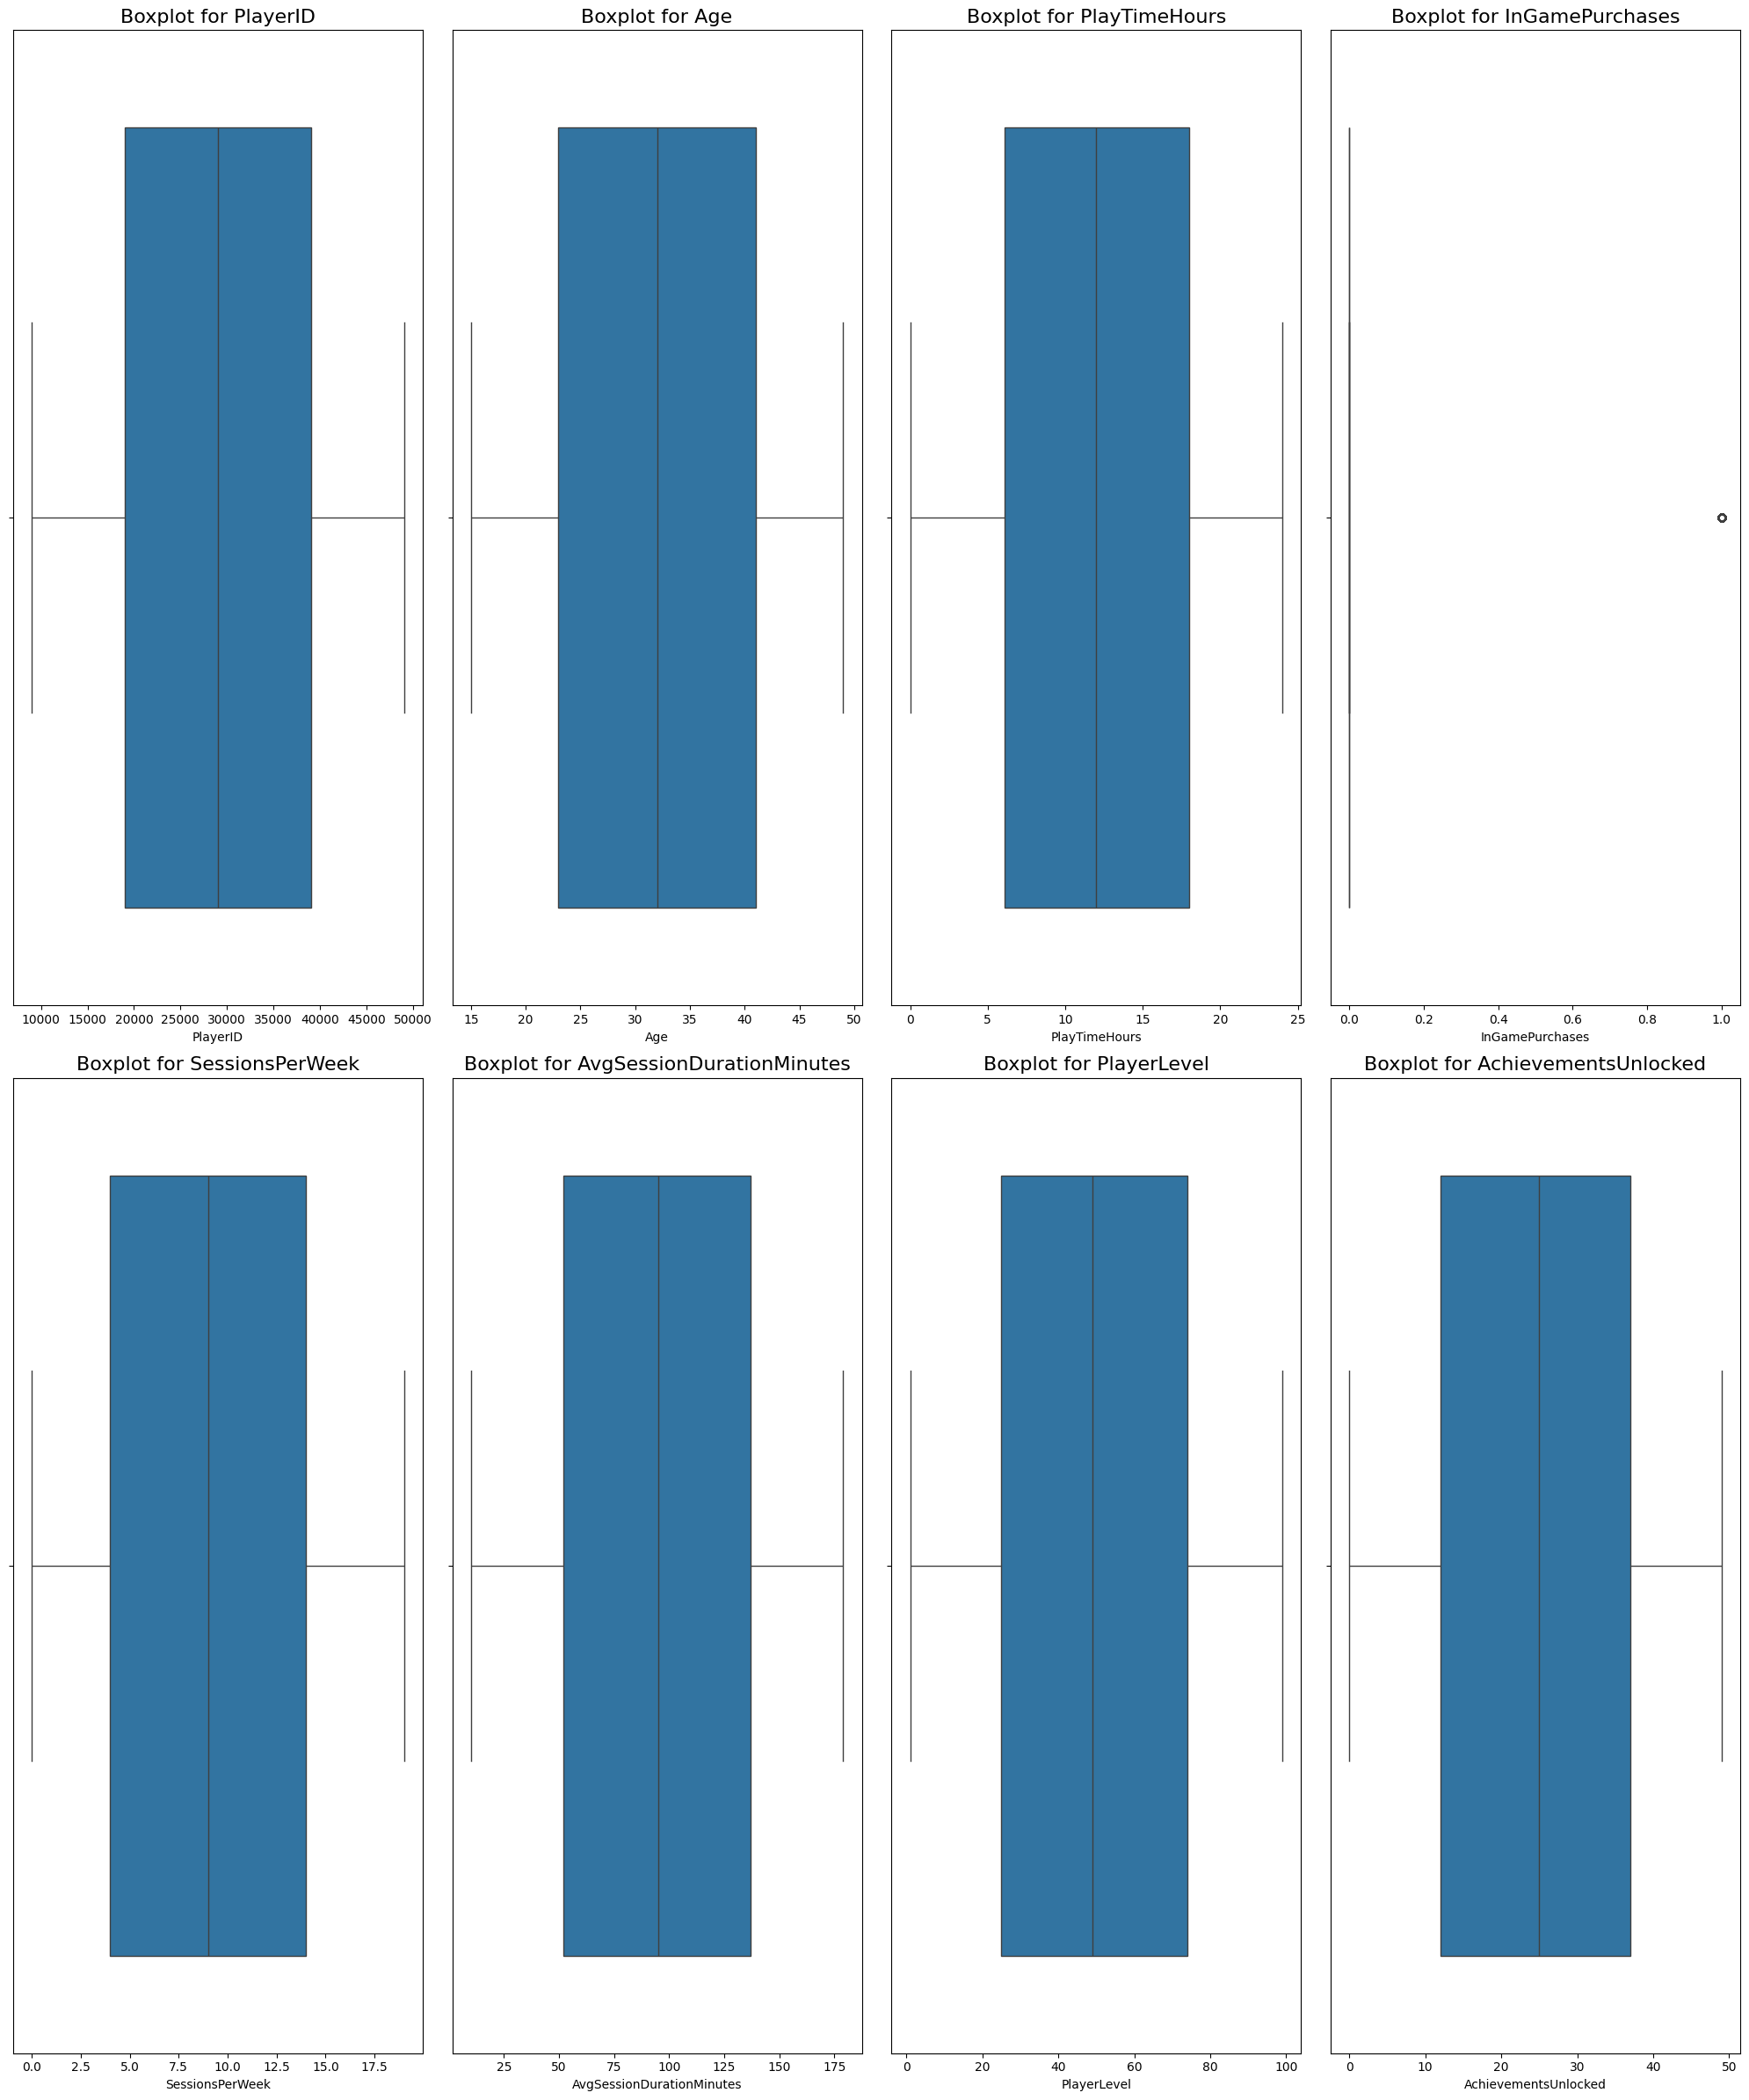

In [84]:
# Usage example
graphs_an(online)

Now in order to conform wheather our data set have outliers or not we define another function with standard `1.5` factor 

In [85]:
def find_outliers(column_list):
    for i in column_list:
        # assigning any value less then zero to zero
        online.loc[online[i] <= 0, i] = 0
        
        q1 = online[i].quantile(0.25)
        q3 = online[i].quantile(0.75)
        iqr = q3 - q1
        
        print("q1 value  ",q1,'\n',"q3 value  ",q3)

        upper_limit = q3 + (1.5 * iqr)  # finding highest and lowest limit
        lower_limit = q1 - (1.5 * iqr)

        print("upper limit value  ",upper_limit,'\n',"lower limit value  ",lower_limit)

        online.loc[online[i] > upper_limit,i] = upper_limit
        print(online[i].describe())


In [86]:
find_outliers(["PlayTimeHours"])

q1 value   6.067500507750126 
 q3 value   17.963831138295756
upper limit value   35.8083270841142 
 lower limit value   -11.776995438068319
count    40034.000000
mean        12.024365
std          6.914638
min          0.000115
25%          6.067501
50%         12.008002
75%         17.963831
max         23.999592
Name: PlayTimeHours, dtype: float64


As we can see from the  above graphs that there are not much outliers in the data set which we conformed by applying each **numaric column** from the data set into the outlier function `find_outliers`. 

In [87]:
online["Gender"].value_counts()

Gender
Male      23959
Female    16075
Name: count, dtype: int64

Getting more insights from the data and one of the column is `Gender` where we see
**Male** - `23959`

**Femal** - `16075` 
which shows that there are more number of male participants who are intrested in gaming more.

Now we can proceed with our finding!




**Predictive modeling of player retention and engagement patterns.**

Ho - Players spending more time have higher engagment level

H1 - Players spending less time does not effect engagment level

In [91]:
online2 = online.copy()
online2 = online2.drop(columns={"Location","Gender"})


In [92]:
# first for engagement level
online2["EngagementLevel"] = (
    online2["EngagementLevel"].astype("category")
    .cat.set_categories(["Low","Medium","High"])
    .cat.codes
)

# Second for game genre
online2["GameGenre"] = (
    online2["GameGenre"].astype("category")
    .cat.set_categories(["Sports", "Action", "Strategy", "Simulation", "RPG"])
    .cat.codes
)

# third for game difficulty
online2["GameDifficulty"] = (
    online2["GameDifficulty"].astype("category")
    .cat.set_categories(["Easy", "Medium", "High"])
    .cat.codes
)


online2 = pd.get_dummies(online2, drop_first= False)
online2.head()


,PlayerID,Age,GameGenre,PlayTimeHours,InGamePurchases,GameDifficulty,SessionsPerWeek,AvgSessionDurationMinutes,PlayerLevel,AchievementsUnlocked,EngagementLevel
0,9000,43,2,16.271119,0,1,6,108,79,25,1
1,9001,29,2,5.525961,0,1,5,144,11,10,1
2,9002,22,0,8.223755,0,0,16,142,35,41,2
3,9003,35,1,5.265351,1,0,9,85,57,47,1
4,9004,33,1,15.531945,0,1,2,131,95,37,1


Text(0.5, 1.0, 'Coresponding Heat map')

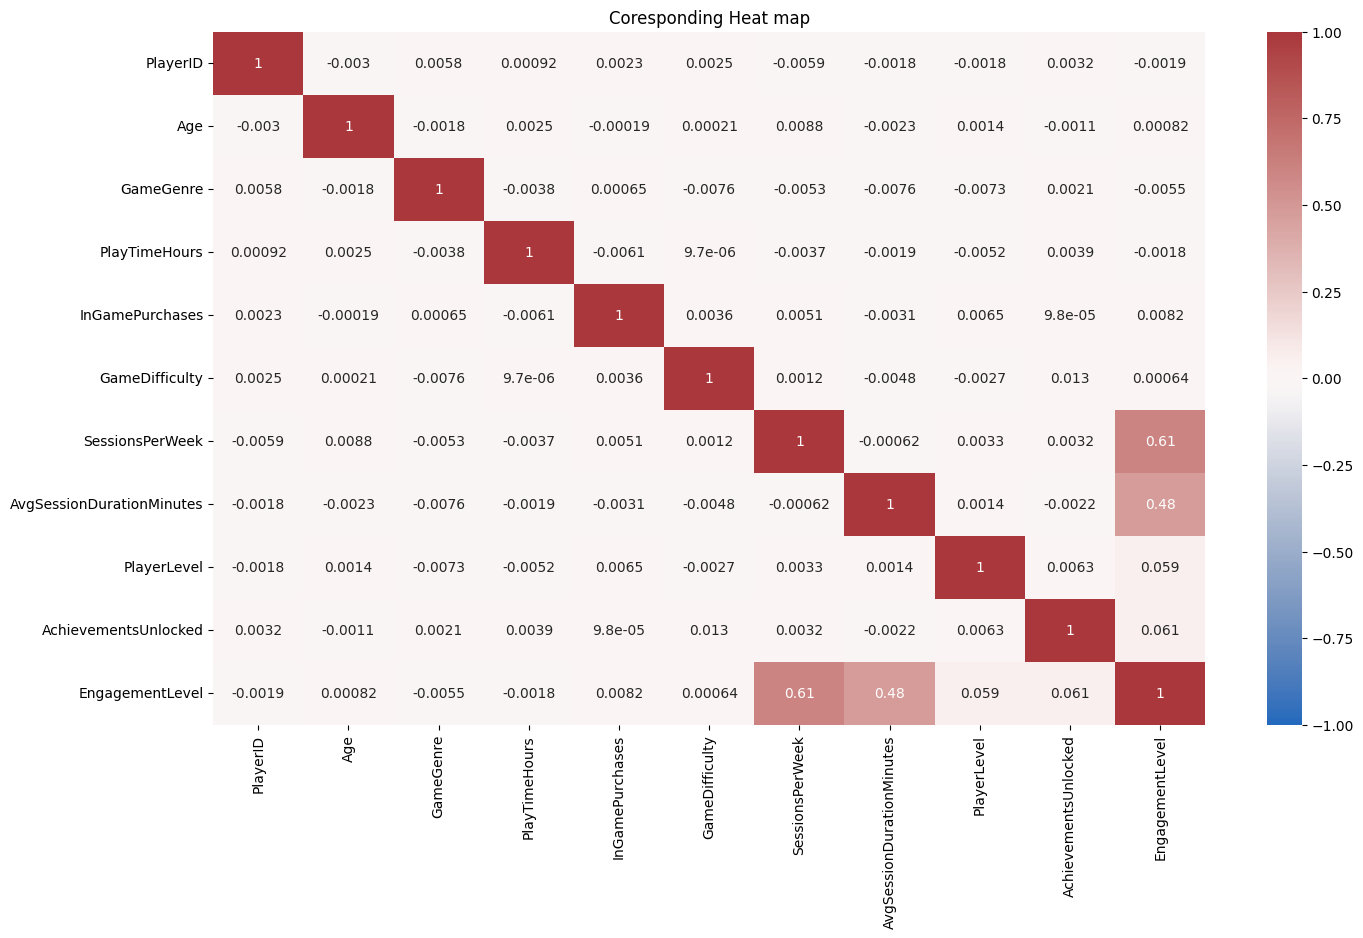

In [93]:
# heat map
plt.figure(figsize=(16,9))
heatmap = sns.heatmap(online2.corr(),vmin=-1,vmax=1,annot=True,cmap=sns.color_palette("vlag",as_cmap=True))
heatmap.set_title("Coresponding Heat map")

Text(0.5, 1.0, 'Coresponding Heat map')

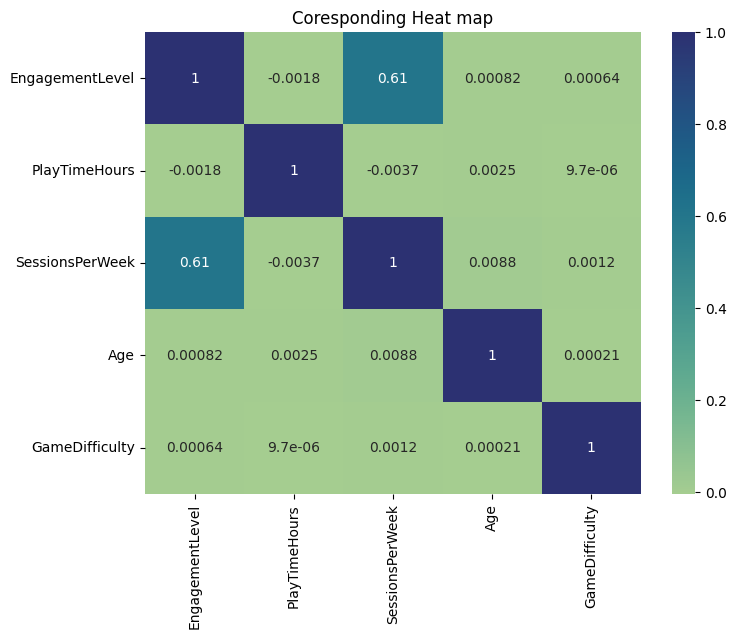

In [95]:
plt.figure(figsize=(8,6))
heatmap = sns.heatmap(online2[["EngagementLevel","PlayTimeHours","SessionsPerWeek","Age","GameDifficulty"]].corr(),annot=True,cmap="crest")
heatmap.set_title("Coresponding Heat map")

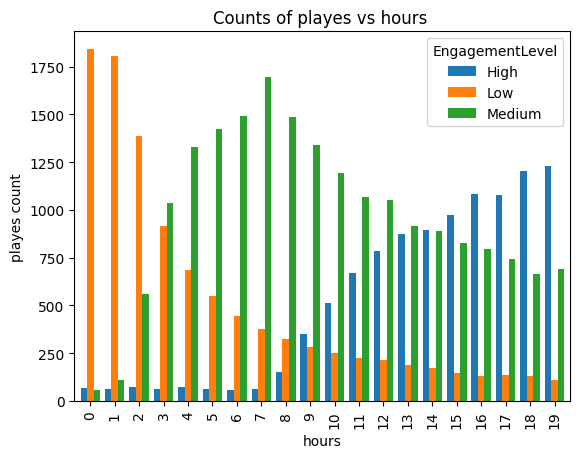

In [100]:
pd.crosstab(online["SessionsPerWeek"], online["EngagementLevel"]).plot(kind ='bar',width = 0.8)
plt.title('Counts of playes vs hours ')
plt.ylabel('playes count')
plt.xlabel('hours')
plt.show()